In [77]:
!pip install aguaclara

In [0]:
import aguaclara as ac
from aguaclara.core.units import unit_registry as u
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [93]:
basepath = "https://raw.githubusercontent.com/monroews/Plant_Performance/master/"
plants = ['Moroceli2016','Jesus_de_Otoro','La_Concordia','Ithaca_WTP_data_2018']
print(basepath+plants[0]+'.tsv')
#dtype={'b':np.float64,'c':np.float64, 'd':np.float64,'e':np.float64}
pddata = [pd.read_csv(basepath+i+'.tsv',sep='\t') for i in plants]
#pddata = [pd.read_csv(basepath+i+'.tsv',sep='\t') for i in plants]


https://raw.githubusercontent.com/monroews/Plant_Performance/master/Moroceli2016.tsv


In [105]:
for i in range(len(plants)):
  print(plants[i])
x = pddata[0]['raw (NTU)']
x[1959]

Moroceli2016
Jesus_de_Otoro
La_Concordia
Ithaca_WTP_data_2018


1100.0

In [0]:
font = 'x-large'
params = {'legend.fontsize': font,
         'figure.figsize': (8,6),
         'axes.labelsize': font,
         'axes.titlesize':font,
         'xtick.labelsize':font,
         'ytick.labelsize':font,
         'axes.formatter.useoffset':False}
plt.rcParams.update(params)


In [124]:
raw = np.array(pddata[0]['raw (NTU)'])
time = np.array(pddata[0]['time'])
print(time[0])
newraw = np.datetime64(raw[0])

11/27/15 10:25


ValueError: ignored

Moroceli2016 raw= 2277 sed= 2277 filter= 2277


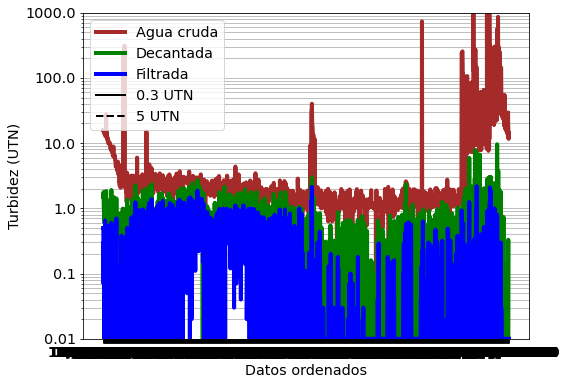

Moroceli2016 Datos de 11/27/15 10:25 a 11/30/16 0:00
Jesus_de_Otoro raw= 940 sed= 940 filter= 940


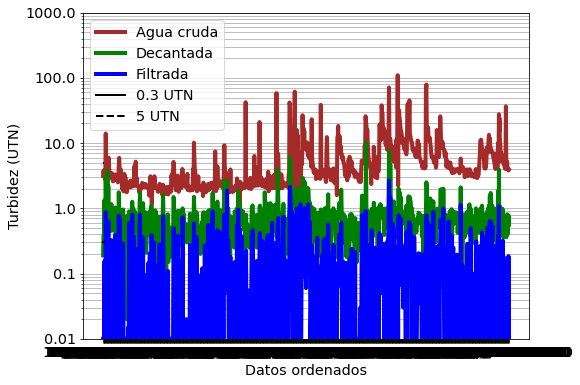

Jesus_de_Otoro Datos de 12/1/2015 13:39 a 12/13/2016 15:30
La_Concordia raw= 2860 sed= 2860 filter= 2860


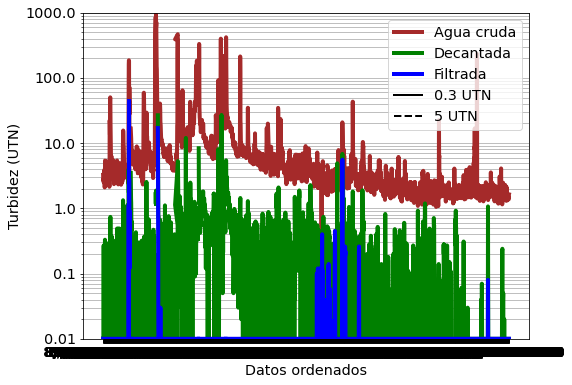

La_Concordia Datos de 8/31/2018 8:00 a 3/3/2019 7:00
Ithaca_WTP_data_2018 raw= 365 sed= 365 filter= 365


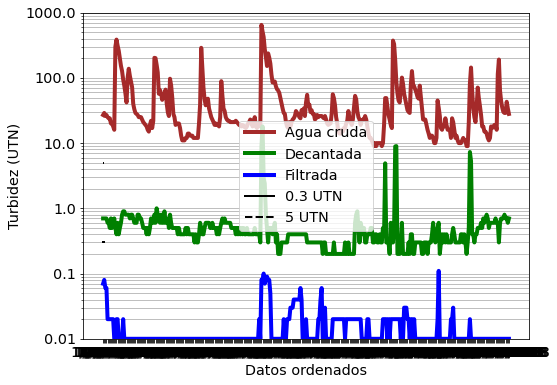

Ithaca_WTP_data_2018 Datos de 1/1/2018 a 12/31/2018


In [113]:
for i in range(len(plants)):
  raw = np.array(pddata[i]['raw (NTU)']) * u.NTU
  for j in range(len(raw)):
    raw[j]=max(raw[j],0.01*u.NTU)
    
  sed = np.array(pddata[i]['sed (NTU)']) * u.NTU
  for j in range(len(sed)):
    sed[j]=max(sed[j],0.01*u.NTU)
  filter = np.array(pddata[i]['filter (NTU)']) * u.NTU
  for j in range(len(filter)):
    filter[j]=max(filter[j],0.01*u.NTU)
  time = np.array(pddata[i]['time'])
  count = raw.shape[0]
  rank = np.linspace(0,1,count,endpoint=True)
  print(plants[i],'raw=',raw.shape[0], 'sed=',sed.shape[0], 'filter=',filter.shape[0])

  plt.plot(time,raw,linewidth=4, color='brown')
  plt.plot(time,sed,linewidth=4, color='green')
  plt.plot(time,filter,linewidth=4, color='blue')
  plt.plot([0,1],[0.3,0.3],linewidth=2, color='black')
  plt.plot([0,1],[5,5],linewidth=2, color='black', linestyle='dashed')
  plt.ylabel('Turbidez (UTN)')
  plt.xlabel('Datos ordenados')
  plt.yscale('log')
  plt.ylim(ymin=0.01,ymax=1000)
  plt.grid(which='both',axis='y')
  plt.legend(['Agua cruda','Decantada','Filtrada','0.3 UTN','5 UTN'])
  plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
  plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
  plt.show()
  print(plants[i],'Datos de',time[0], 'a', time[-1])

In [117]:
time[0]

'1/1/2018'

In [111]:
raw[0] * 10

160.0

Moroceli2016 raw= 2277 sed= 2277 filter= 2277


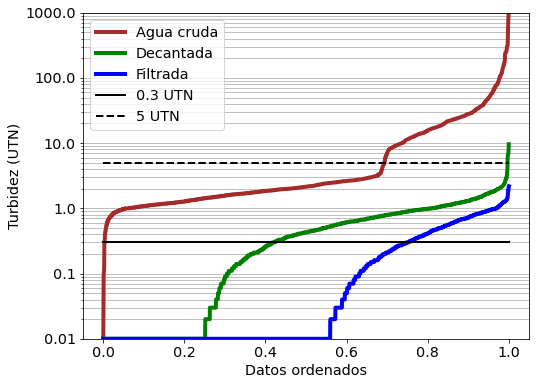

Moroceli2016 Datos de 11/27/15 10:25 a 11/30/16 0:00
Jesus_de_Otoro raw= 940 sed= 940 filter= 940


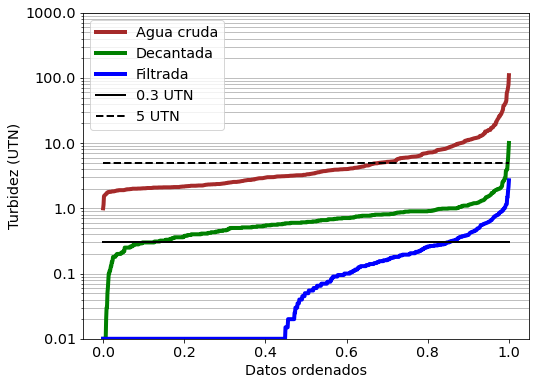

Jesus_de_Otoro Datos de 12/1/2015 13:39 a 12/13/2016 15:30
La_Concordia raw= 2860 sed= 2860 filter= 2860


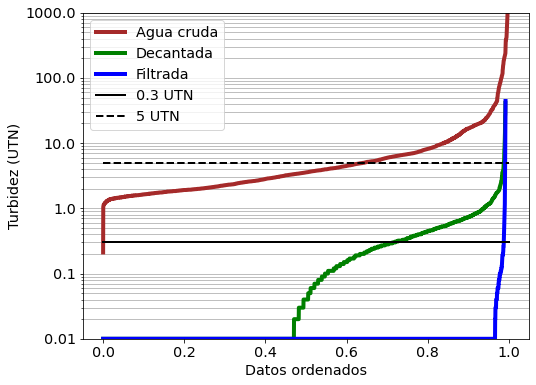

La_Concordia Datos de 8/31/2018 8:00 a 3/3/2019 7:00
Ithaca_WTP_data_2018 raw= 365 sed= 365 filter= 365


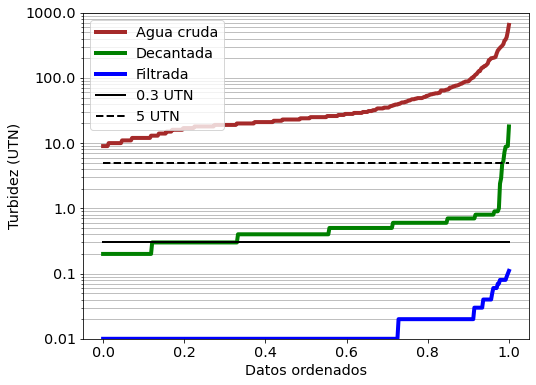

Ithaca_WTP_data_2018 Datos de 1/1/2018 a 12/31/2018


In [114]:
for i in range(len(plants)):
  raw = np.sort(pddata[i]['raw (NTU)']) * u.NTU
  for j in range(len(raw)):
    raw[j]=max(raw[j],0.01*u.NTU)
  sed = np.sort(pddata[i]['sed (NTU)']) * u.NTU
  for j in range(len(sed)):
    sed[j]=max(sed[j],0.01*u.NTU)
  filter = np.sort(pddata[i]['filter (NTU)']) * u.NTU
  for j in range(len(filter)):
    filter[j]=max(filter[j],0.01*u.NTU)
  time = np.array(pddata[i]['time'])
  count = raw.shape[0]
  rank = np.linspace(0,1,count,endpoint=True)
  print(plants[i],'raw=',raw.shape[0], 'sed=',sed.shape[0], 'filter=',filter.shape[0])


  plt.plot(rank,raw,linewidth=4, color='brown')
  plt.plot(rank,sed,linewidth=4, color='green')
  plt.plot(rank,filter,linewidth=4, color='blue')
  plt.plot([0,1],[0.3,0.3],linewidth=2, color='black')
  plt.plot([0,1],[5,5],linewidth=2, color='black', linestyle='dashed')
  plt.ylabel('Turbidez (UTN)')
  plt.xlabel('Datos ordenados')
  plt.yscale('log')
  plt.ylim(ymin=0.01,ymax=1000)
  plt.grid(which='both',axis='y')
  plt.legend(['Agua cruda','Decantada','Filtrada','0.3 UTN','5 UTN'])
  plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
  plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
  plt.show()
  print(plants[i],'Datos de',time[0], 'a', time[-1])



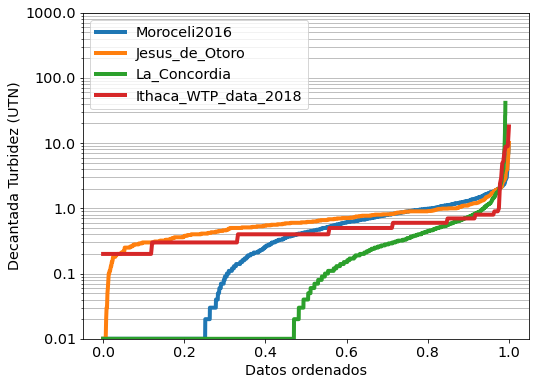

In [115]:
for i in range(len(plants)):
  sed = np.sort(pddata[i]['sed (NTU)']) * u.NTU
  for j in range(len(sed)):
    sed[j]=max(sed[j],0.01*u.NTU)
  time = np.array(pddata[i]['time'])
  count = sed.shape[0]
  rank = np.linspace(0,1,count,endpoint=True)
  plt.plot(rank,sed,linewidth=4)

plt.ylabel('Decantada Turbidez (UTN)')
plt.xlabel('Datos ordenados')
plt.yscale('log')
plt.ylim(ymin=0.01,ymax=1000)
plt.legend(plants)
plt.grid(which='both',axis='y')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
plt.show()


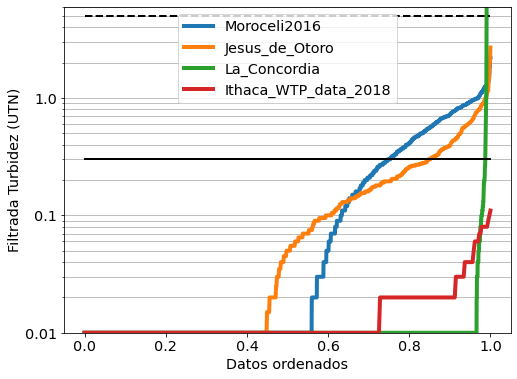

In [116]:
for i in range(len(plants)):
  filter = np.sort(pddata[i]['filter (NTU)']) * u.NTU
  for j in range(len(filter)):
    filter[j]=max(filter[j],0.01*u.NTU)
  time = np.array(pddata[i]['time'])
  count = filter.shape[0]
  rank = np.linspace(0,1,count,endpoint=True)
  plt.plot(rank,filter,linewidth=4)

plt.plot([0,1],[0.3,0.3],linewidth=2, color='black')
plt.plot([0,1],[5,5],linewidth=2, color='black', linestyle='dashed')
plt.ylabel('Filtrada Turbidez (UTN)')
plt.xlabel('Datos ordenados')
plt.yscale('log')
plt.ylim(ymin=0.01,ymax=6)
plt.grid(which='both',axis='y')
plt.legend(plants)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
plt.show()